## Final Project Submission

Please fill out:
* Student name: LaShanni Butler
* Student pace: Part time 
* Scheduled project review date/time: 1/25/19 @ 11:15am PST
* Instructor name: Jeff Herman
* Blog post URL:(please see word doc)


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Part 1: Import and analyze data

### Importing the libraries and dataset

In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import statsmodels as sm
from statsmodels.api import formula
import matplotlib.pyplot as plt #generating plots
import seaborn as sns #generating plots
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv') # Reading Kings County data

## What are some steps to keep in mind to start
1) Figure out the question: what problem are we solving in regards to this dataset? <br>

2) Goal: Predict housing prices based on features in dataset <br>
  - Using good data science <br>
    
3) Clean the data <br>
  - Look at data to determine datatypes <br>
  - Look for missing data (null values) <br>
  - Look for filler data/placeholders <br>
  - Remove columns that are not needed/drop columns (spare columns with no data) <br>
    
4) Analyze the data <br>
  - Using EDA <br>
  - Linear Regression <br>
  - Multiple Regression <br>
    

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.describe() # to look at the 5 point statistics

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Dropping id, date, lat, and long columns as they're not necessary for this analysis
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('sqft_basement', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
# I see there is a home in the max column that has 33 bedrooms.  This does not look correct to me and I believe it will skew 
# the data, so I will delete this from the dataset
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax())

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Missing Data in the following: Waterfront, View and Year Renovated

In [11]:
df.isnull().sum()

price               0
bedrooms            1
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
# Calculate percentage of null values in watefront
df.waterfront.isna().sum() / df.shape[0]

0.11001527989998611

In [13]:
# Looking at all total null values in Year Renovated, Waterfront and View
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
bedrooms,1,0.000046
sqft_lot15,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000
condition,0,0.000000


In [14]:
df.waterfront.unique() 

array([nan,  0.,  1.])

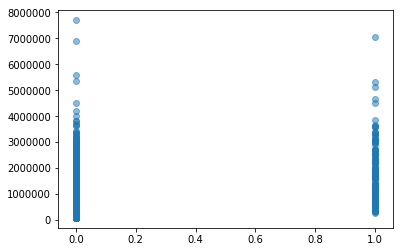

In [15]:
x = df['waterfront']
y = df['price']

plt.scatter(x,y, alpha=0.5)
plt.show()

In [16]:
df2 = df[df.waterfront==df.waterfront] # Looking at everything that equals null value in waterfront
df2.shape

(19221, 18)

In [17]:
# I can now look at the count and see there are 146 waterfront houses
print(df2[df2.waterfront==0].shape, df2[df2.waterfront==1].shape)

(19075, 18) (146, 18)


In [18]:
df2[df2.waterfront==0].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.907500e+04,19074.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,19075.000000,19075.000000,19075.000000,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000
mean,5.326420e+05,3.373283,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
std,3.449592e+05,0.902010,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,1.165675,824.965911,29.391929,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000
75%,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
df2[df2.waterfront==1].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,1.781233,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


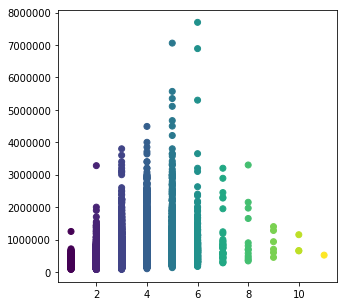

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(df.bedrooms, df.price, c=df.bedrooms.values);
plt.show()

Number of bedrooms are related to price but relationship is not clear based on the data given

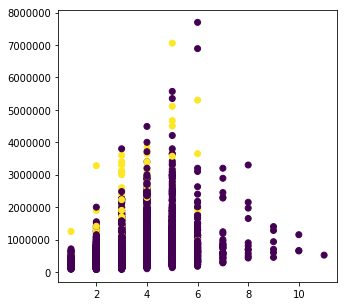

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(df.bedrooms, df.price, c=df.waterfront.values);
plt.show()

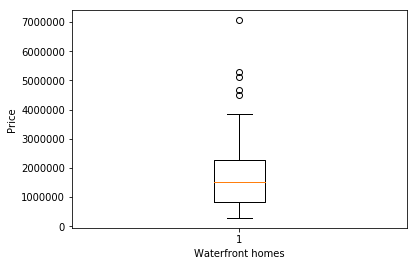

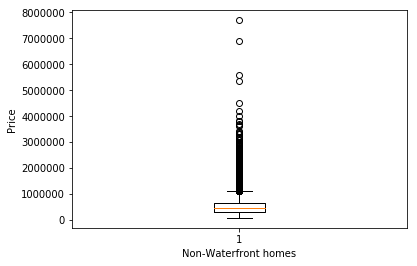

In [22]:
plt.boxplot(df2[df2.waterfront==1]['price']);
plt.xlabel('Waterfront homes')
plt.ylabel('Price')
plt.show()
plt.boxplot(df2[df2.waterfront==0]['price']);
plt.xlabel('Non-Waterfront homes')
plt.ylabel('Price')
plt.show()

* Both boxplots show the outliers in waterfront vs non-waterfront houses
* Non-waterfront houses show many homes that fall outside of the mean

In analyzing the missing data, I'll consider any value greater than 15% missing.  Thus it would be best to delete that value or possibly fill the value in with the average value.  According to the dataset, year renovated (yr_renovated) is 17%, and waterfront is 11%.  I'm going to drop all the columns that I don’t see a need for now. I can always add them back later.  I am also going clean up the datatypes, drop columns,and  fix NaNs.

In [23]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
bedrooms,1,0.000046
sqft_lot15,0,0.000000


In [24]:
df.waterfront.fillna(0,inplace=True)
df.yr_renovated.fillna(0,inplace=True)
df.waterfront = df.waterfront.astype('int64')
df.yr_renovated = df.yr_renovated.astype('int64')
print(df.isna().sum())
df.head()

price             0
bedrooms          1
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0.0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0.0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0.0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0.0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0.0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,360000.0,3.0,2.50,1530,1131,3.0,0,0.0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4.0,2.50,2310,5813,2.0,0,0.0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2.0,0.75,1020,1350,2.0,0,0.0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3.0,2.50,1600,2388,2.0,0,0.0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287
21596,325000.0,2.0,0.75,1020,1076,2.0,0,0.0,3,7,1020,2008,0,98144,47.5941,-122.299,1020,1357


A quick check shows that the columns and missing values I was concerned about have been addressed.


#### Addressing outliers in the dataset

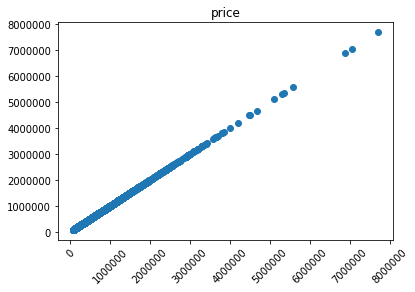

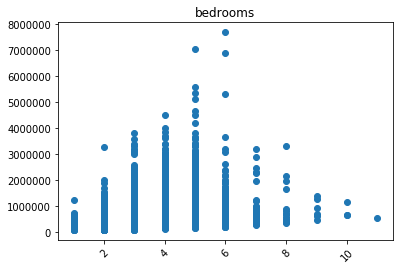

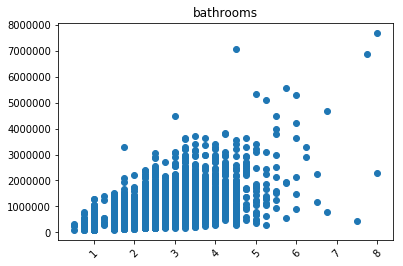

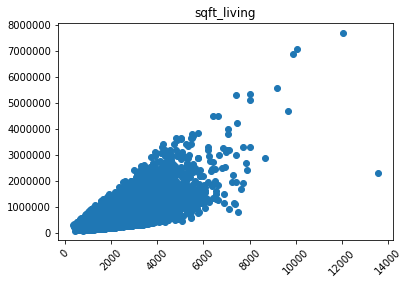

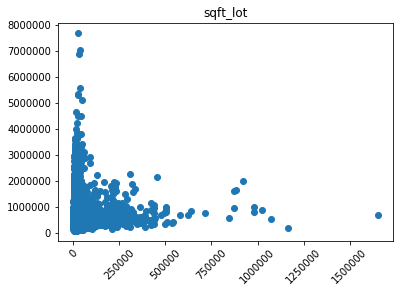

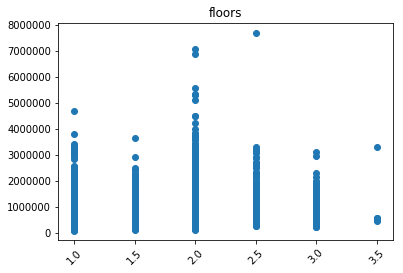

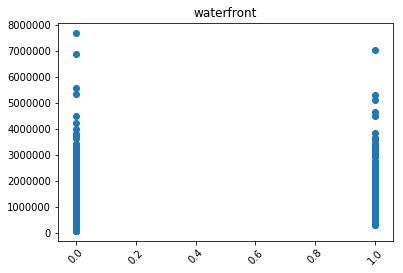

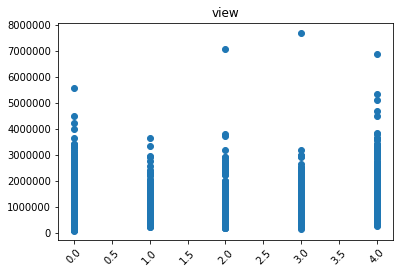

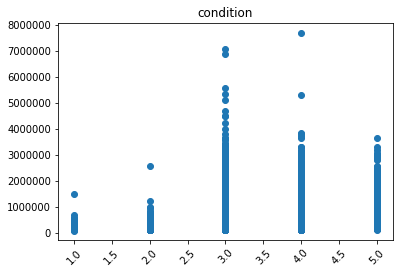

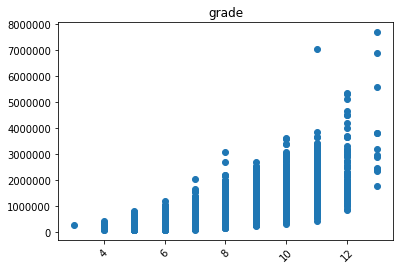

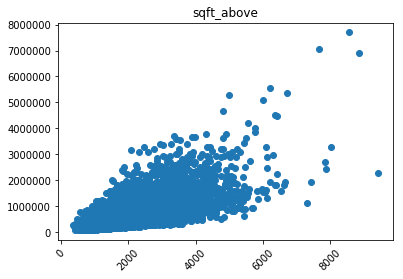

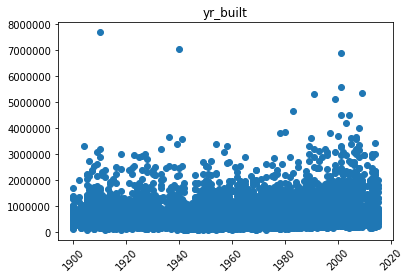

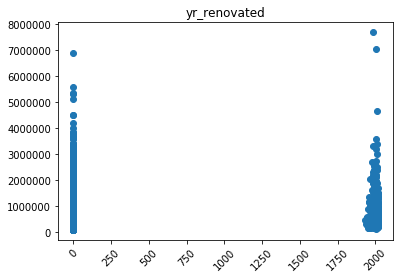

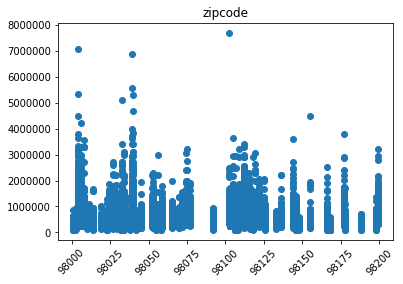

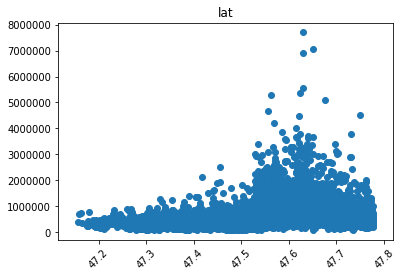

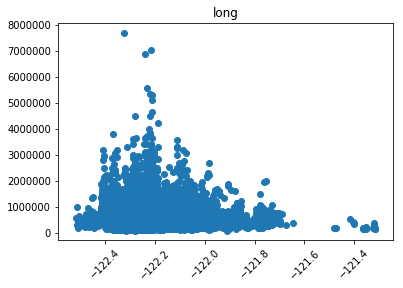

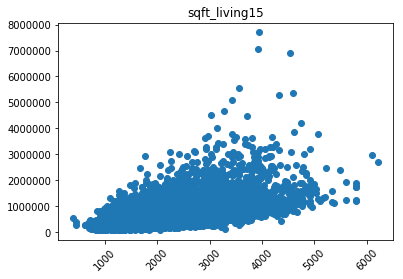

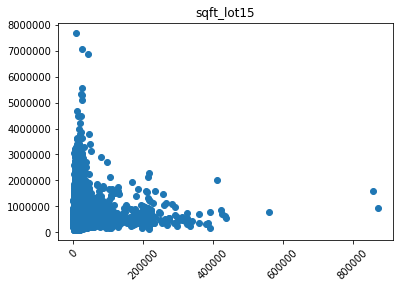

In [26]:
#I'll address the outliers in each category (column)
for column in df.columns:
    plt.scatter(df[column], df.price)
    plt.xticks(rotation=45)
    plt.title(column)
    plt.show();

In [27]:
#In looking at price, I see homes at approx. the $4 million mark
#should be removed, so it won't skew the dataset adversely
df = df[df['price'] < 4000000]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0.0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0.0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0.0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0.0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0.0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,360000.0,3.0,2.50,1530,1131,3.0,0,0.0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4.0,2.50,2310,5813,2.0,0,0.0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2.0,0.75,1020,1350,2.0,0,0.0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3.0,2.50,1600,2388,2.0,0,0.0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287
21596,325000.0,2.0,0.75,1020,1076,2.0,0,0.0,3,7,1020,2008,0,98144,47.5941,-122.299,1020,1357


In [29]:
#Also at quick glance, I see that sqft_living and sqft_lot
#have outliers that may affect the dataset, so I'll remove them
df = df.loc[df['sqft_living'] < 7000]
df = df.loc[df['sqft_lot'] < 450000]

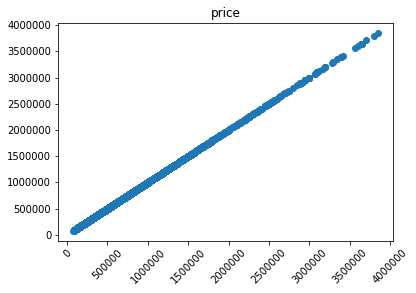

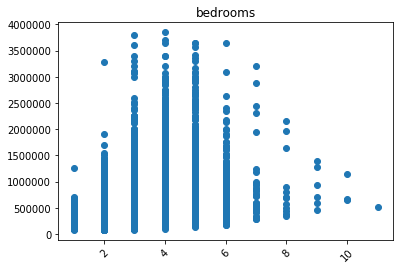

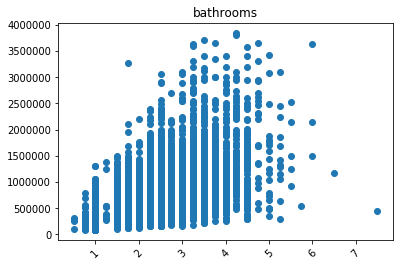

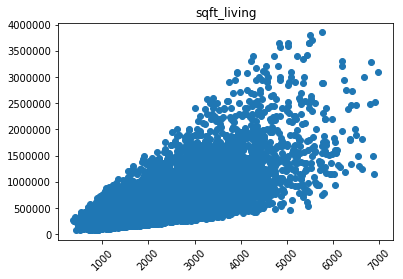

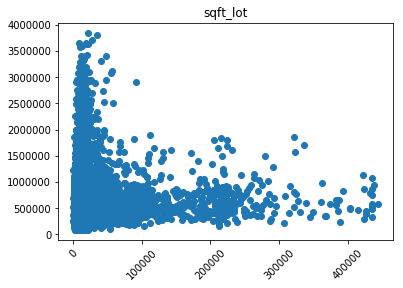

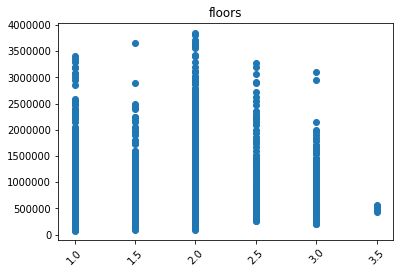

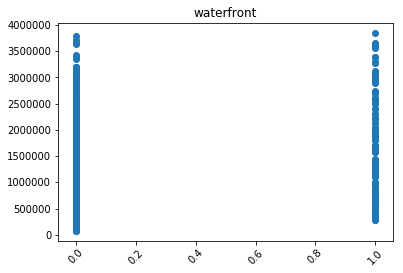

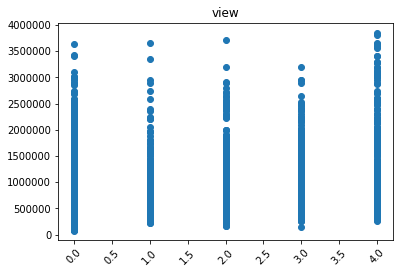

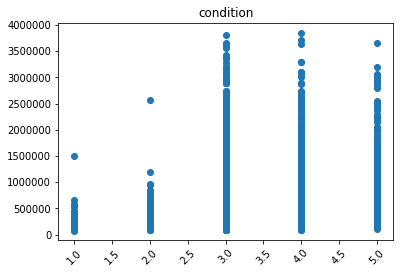

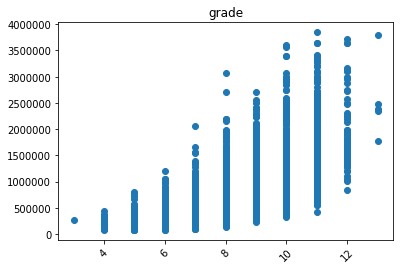

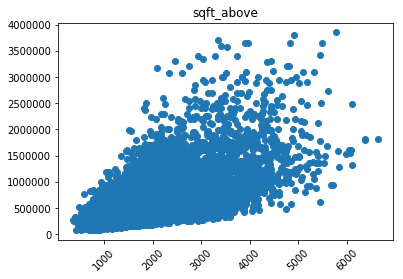

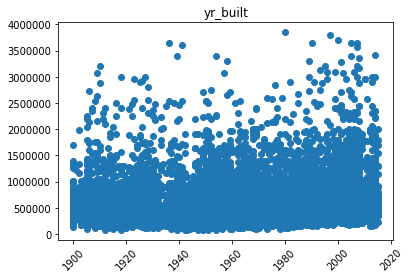

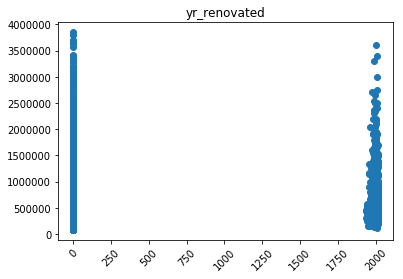

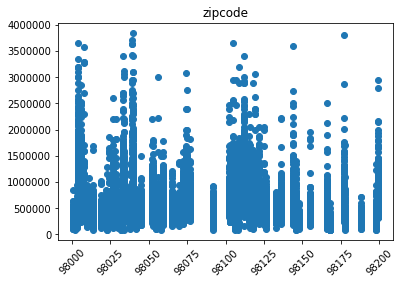

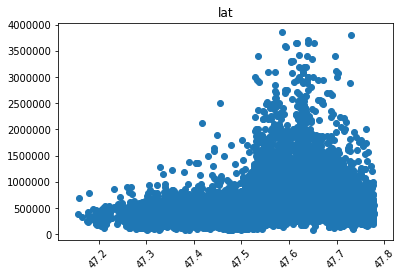

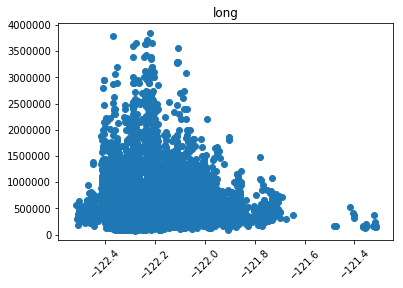

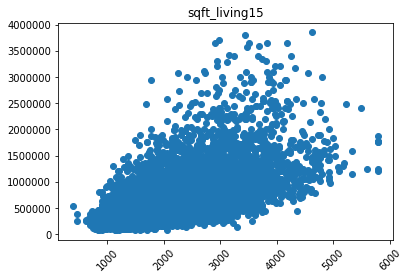

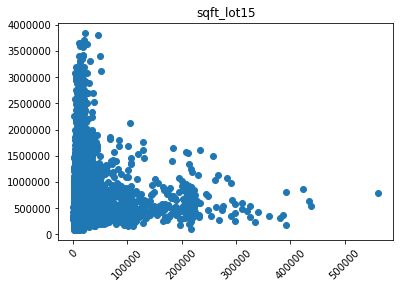

In [30]:
#Check recheck to make sure the outliers in price
#have been addressed
for column in df.columns:
    plt.scatter(df[column], df.price)
    plt.xticks(rotation=45)
    plt.title(column)
    plt.show();

In [31]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0.0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0.0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0.0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0.0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0.0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,360000.0,3.0,2.50,1530,1131,3.0,0,0.0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4.0,2.50,2310,5813,2.0,0,0.0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2.0,0.75,1020,1350,2.0,0,0.0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3.0,2.50,1600,2388,2.0,0,0.0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287
21596,325000.0,2.0,0.75,1020,1076,2.0,0,0.0,3,7,1020,2008,0,98144,47.5941,-122.299,1020,1357


## Part 2: Exploring the dataset with visualizations

In [33]:
df['price'].describe()

count    2.154100e+04
mean     5.356540e+05
std      3.428667e+05
min      7.800000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.410000e+05
max      3.850000e+06
Name: price, dtype: float64

* The dataset shows the minimun price for Kings County homes are $78,000  

* The maximun price for Kings County home is $7,700,000 

* The average (or mean) price of a Kings County home is $540,296.60

#### Histogram and Distplot of Price

C:\Users\lasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


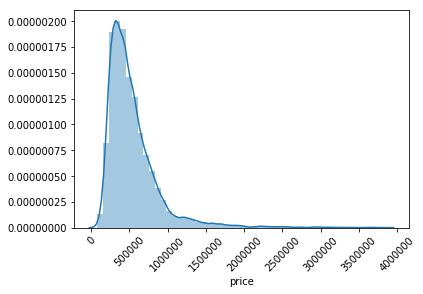

In [34]:
#histogram of price
sns.distplot(df['price']);
plt.xticks(rotation=45);

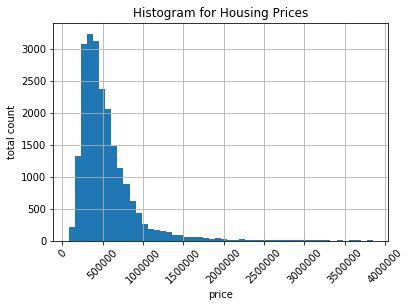

In [35]:
plt.xlabel('price')
plt.ylabel('total count')
plt.title('Histogram for Housing Prices')
df.price.hist(bins=50)
plt.xticks(rotation=45);

In [36]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 2.910839
Kurtosis: 13.956356


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

#### Histogram and distplot of square feet

C:\Users\lasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


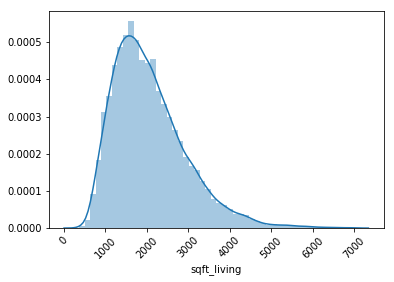

In [37]:
#histogram of square feet
sns.distplot(df['sqft_living']);
plt.xticks(rotation=45);

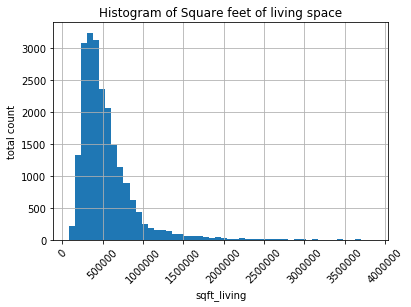

In [38]:
plt.xlabel('sqft_living')
plt.ylabel('total count')
plt.title('Histogram of Square feet of living space')
df.price.hist(bins=50)
plt.xticks(rotation=45);

In [39]:
#skewness and kurtosis
print("Skewness: %f" % df['sqft_living'].skew())
print("Kurtosis: %f" % df['sqft_living'].kurt())

Skewness: 1.110623
Kurtosis: 1.811876


Both plots show the following:

* There is a devation from the normal distribution
* Both plots have appreciable positive skewness
* Both plots show peakedness

## Heat Map

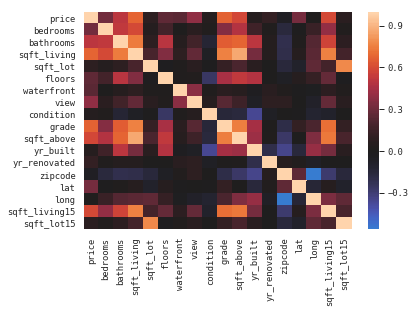

<Figure size 1080x576 with 0 Axes>

In [40]:
sns.set(context="paper", font="monospace")
sns.heatmap(df.corr(), center=0)
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 8))
plt.show();

In [41]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315123,0.514144,0.688012,0.088591,0.262906,0.245906,0.394879,0.042166,0.673627,0.590158,0.052125,0.114077,-0.050953,0.324053,0.020993,0.595193,0.073881
bedrooms,0.315123,1.000000,0.524825,0.596512,0.040818,0.180951,-0.007938,0.075107,0.023827,0.360995,0.491005,0.161122,0.016977,-0.159052,-0.012776,0.136895,0.401322,0.031846
bathrooms,0.514144,0.524825,1.000000,0.748816,0.089369,0.504843,0.052180,0.174524,-0.126537,0.658841,0.677451,0.512283,0.044260,-0.205950,0.022276,0.226378,0.566891,0.078998
sqft_living,0.688012,0.596512,0.748816,1.000000,0.192307,0.356027,0.087859,0.269166,-0.058360,0.759820,0.870960,0.324320,0.046033,-0.203143,0.050598,0.245541,0.761228,0.177454
sqft_lot,0.088591,0.040818,0.089369,0.192307,1.000000,-0.016207,0.020644,0.070253,-0.014056,0.125652,0.202208,0.065559,0.008193,-0.148923,-0.093197,0.262652,0.180955,0.781504
floors,0.262906,0.180951,0.504843,0.356027,-0.016207,1.000000,0.020904,0.026043,-0.264286,0.458549,0.528774,0.489914,0.003176,-0.059472,0.048568,0.125775,0.278579,-0.018607
waterfront,0.245906,-0.007938,0.052180,0.087859,0.020644,0.020904,1.000000,0.379502,0.016947,0.073738,0.060064,-0.026492,0.070448,0.030960,-0.013549,-0.037583,0.077474,0.033711
view,0.394879,0.075107,0.174524,0.269166,0.070253,0.026043,0.379502,1.000000,0.047229,0.241146,0.151526,-0.057280,0.088778,0.088292,0.006404,-0.081925,0.273172,0.065642
condition,0.042166,0.023827,-0.126537,-0.058360,-0.014056,-0.264286,0.016947,0.047229,1.000000,-0.146568,-0.160004,-0.361323,-0.056079,0.002856,-0.013827,-0.106001,-0.092917,-0.003817
grade,0.673627,0.360995,0.658841,0.759820,0.125652,0.458549,0.073738,0.241146,-0.146568,1.000000,0.751582,0.449622,0.012943,-0.186182,0.113030,0.200195,0.711914,0.114195


The independent values strongly correlated to Price are below.  I choose these values because they are greater than 0.50:
* Bathrooms
* Sqft_living
* Sqft_above
* Grade
* Yr_built
* Sqft_living15

Before I can confirm if these values are stronly correlated to price, I will have to run a multicollinearly check though.

## Part 3: Linear and Mutliple Regression

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

### Looking at Multicollinearity of the dataset.
* To identify the relationship between my predictor value (price) vs the outcome variables (bathrooms, sqft_living, sqft_lot, grade, sqft_above, yr_built, sqft_living15), I'm conducting a multicollinearity check

In [43]:
df = pd.read_csv('kc_house_data.csv')
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('sqft_basement', axis=1, inplace=True)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [44]:
df_pred = df.iloc[:22]
df_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
df_pred.info() #Quick comparison that the columns and rows match the correlation above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 18 columns):
price            22 non-null float64
bedrooms         22 non-null int64
bathrooms        22 non-null float64
sqft_living      22 non-null int64
sqft_lot         22 non-null int64
floors           22 non-null float64
waterfront       20 non-null float64
view             21 non-null float64
condition        22 non-null int64
grade            22 non-null int64
sqft_above       22 non-null int64
yr_built         22 non-null int64
yr_renovated     20 non-null float64
zipcode          22 non-null int64
lat              22 non-null float64
long             22 non-null float64
sqft_living15    22 non-null int64
sqft_lot15       22 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.2 KB


In [46]:
df.corr() #comparing dataset to predictor dataset for multicollinearity

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981


In [47]:
df_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.249440,0.639824,0.693424,0.653710,-0.123587,NaN,0.720743,-0.170985,0.741880,0.645039,0.210055,0.004500,-0.094458,0.155923,0.135170,0.749660,0.493721
bedrooms,0.249440,1.000000,0.473000,0.389882,0.147125,0.200626,NaN,0.104426,0.040036,0.330824,0.364651,-0.063191,-0.082144,0.326705,0.197003,-0.276918,0.072717,0.195598
bathrooms,0.639824,0.473000,1.000000,0.865149,0.633892,0.202881,NaN,0.331337,-0.227406,0.786265,0.800659,0.580914,0.067735,-0.083546,0.038200,0.281350,0.676582,0.642724
sqft_living,0.693424,0.389882,0.865149,1.000000,0.767103,0.081031,NaN,0.318797,-0.310798,0.895043,0.890357,0.415772,0.119916,-0.150697,0.159429,0.289317,0.749010,0.763076
sqft_lot,0.653710,0.147125,0.633892,0.767103,1.000000,-0.197292,NaN,0.201351,-0.199656,0.819436,0.795358,0.327036,-0.071755,-0.221654,0.132713,0.423029,0.847060,0.967616
floors,-0.123587,0.200626,0.202881,0.081031,-0.197292,1.000000,NaN,0.090532,-0.313397,-0.069747,0.287038,0.212196,0.373367,-0.152688,0.030923,0.017115,-0.007478,-0.161459
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.720743,0.104426,0.331337,0.318797,0.201351,0.090532,NaN,1.000000,-0.235772,0.480275,0.271724,0.146241,-0.079939,0.021347,-0.065485,-0.153856,0.456321,0.013132
condition,-0.170985,0.040036,-0.227406,-0.310798,-0.199656,-0.313397,NaN,-0.235772,1.000000,-0.281847,-0.426520,-0.312677,-0.157378,0.026402,-0.009442,-0.268804,-0.458834,-0.195183
grade,0.741880,0.330824,0.786265,0.895043,0.819436,-0.069747,NaN,0.480275,-0.281847,1.000000,0.840043,0.441672,-0.111943,-0.084471,0.056803,0.303683,0.755057,0.784613


I'll consider any value over 0.75 high absolute value.  Thus any variable highly correlated with each other will be removed from the analyses.

In [48]:
abs(df_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True
sqft_lot,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True


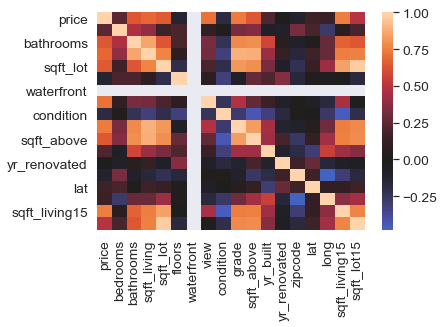

In [49]:
#Visualizing multicollinearity of 0.75 as a heatmap
sns.heatmap(df_pred.corr(), center=0);

Setting the multicollinearity to 0.50 omitted all outcome variables I thought were significant in my intial exploration of the dataset. So I will not compare these outcome values (bathrooms, sqft_living, sqft_lot, grade, sqft_above, sqftliving15) to predict price since they are highly correlated.  I'll focus on the other outcome variables that were not on this for my analysis.  Based on the remaining outcome variables, I will examine the following:
* bedrooms
* floors
* condition
* yr_built
* zipcode
* sqft_lot15

I will not analyze waterfront and yr_reno since these either have missing values or issues with how consistent the data was recorded.

### X and Y arrays

In [50]:
X = df[['bedrooms', 'floors', 'condition','grade', 'zipcode', 'bathrooms']]
y = df['price']

### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating the Training Model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
lm.score(X_test, y_test)

0.5009752116067647

### Model Evalation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [57]:
# print the intercept
print(lm.intercept_)

-66937977.05953046


In [58]:
lm.coef_

array([  8562.3211098 , -53732.13707915,  70448.18852656, 193187.10883418,
          669.17383767,  85278.82291951])

In [59]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,8562.321110
floors,-53732.137079
condition,70448.188527
grade,193187.108834
zipcode,669.173838
bathrooms,85278.822920


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Bedrooms** is associated with an **increase of \$109,221.70 **.
- Holding all other features fixed, a 1 unit increase in **Floors** is associated with an **increase of \$189,286.75 **.
- Holding all other features fixed, a 1 unit increase in **Condition** is associated with an **increase of \$33,099.31 **.
- Holding all other features fixed, a 1 unit increase in **Year Built** is associated with an **decrease of \$1,471.40 **.
- Holding all other features fixed, a 1 unit increase in **Zipcode** is associated with an **decrease of \$136.32 **.
- Holding all other features fixed, a 1 unit increase in **Square feet lot 15** is associated with an **decrease of \$1.08 **.

### Predictions from our Model
Grabbing predictions off of test set and see how well it fits!

In [60]:
predictions = lm.predict(X_test)

Text(0,0.5,'Price')

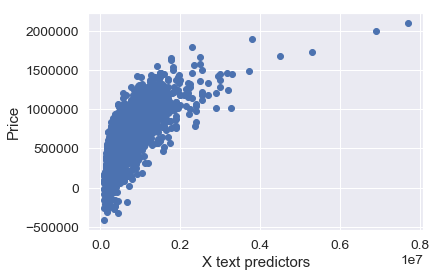

In [61]:
plt.scatter(y_test,predictions) 
plt.xlabel('X text predictors')
plt.ylabel('Price')

C:\Users\lasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


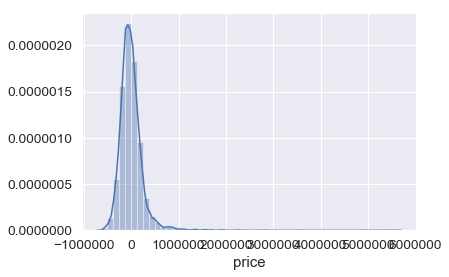

In [62]:
#Residual Historgram
sns.distplot((y_test-predictions),bins=50);

In [63]:
from sklearn import metrics

In [64]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 66178877922.02683


## Regression Evaluation Metrics

For my analysis, I will evaluate Mean Squared Error.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

* Obtained from Udemy.com Python for data science and machine learning course, Linear regression lecture (section 15, lecture 82).  Url https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733428?start=0

In [65]:
import statsmodels.api as sms

### Bedrooms

In [66]:
X = df.bedrooms
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:01:01   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$: The model explains 9.5% of the variability of Price (y).

$\hat{\beta}_0$: If we don't have any bedrooms factor in the picture, we would expect Price (y) to be 1.27 exponentially raised to power of 5. 

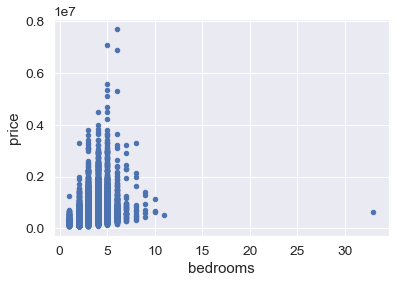

In [67]:
df.plot(x='bedrooms',   
           y='price',
           kind='scatter');

### Floors

In [68]:
X = df.floors
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1525.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          2.57e-322
Time:                        17:01:03   Log-Likelihood:            -3.0665e+05
No. Observations:               21597   AIC:                         6.133e+05
Df Residuals:                   21595   BIC:                         6.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.791e+05   7111.797     39.247      0.000    2.65e+05    2.93e+05
floors      1.748e+05   4476.843     39.047      0.000    1.66e+05    1.84e+05
==============================================================================
Omnibus:                    19356.966   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1255747.571
Skew:                           4.076   Prob(JB):                         0.00
Kurtosis:                      39.456   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$: The model explains 6.6% of the variability of Price (y).

$\hat{\beta}_0$: If we don't have any floors factored in the picture, we would expect Price (y) to be 2.79 exponentially raised to power of 5. 

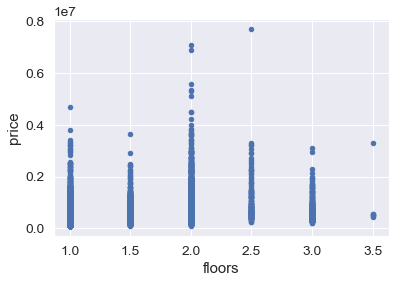

In [69]:
df.plot(x='floors',   
           y='price',
           kind='scatter');

### Condition

In [70]:
X = df.condition
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.16e-07
Time:                        17:01:04   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$: The model explains 0% of the variability of Price (y).

$\hat{\beta}_0$: If we don't have condition factor in the picture, we would expect Price (y) to be 4.71 exponentially raised to power of 5. 

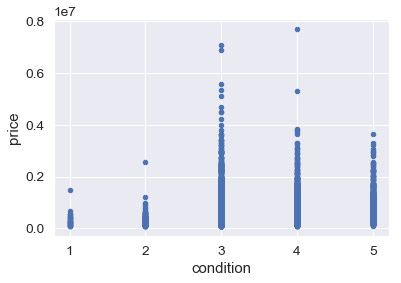

In [71]:
df.plot(x='condition',   
           y='price',
           kind='scatter');

### Year Built

In [72]:
X = df.yr_built
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           2.12e-15
Time:                        17:01:05   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.896e+05   1.68e+05     -4.714      0.000   -1.12e+06   -4.61e+05
yr_built     674.7431     84.979      7.940      0.000     508.178     841.308
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$: The model explains 0% of the variability of Price (y).

$\hat{\beta}_0$: If we don't have year built factored in the picture, we would expect Price (y) to be -7.90 exponentially raised to power of 5 (so a very small number).

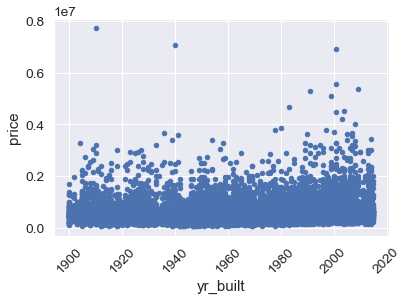

In [73]:
df.plot(x='yr_built',   
           y='price',
           kind='scatter');
plt.xticks(rotation=45);

### Zipcode

In [74]:
X = df.zipcode
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           4.06e-15
Time:                        17:01:07   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$: The model explains 0.3% of the variability of Price (y).

$\hat{\beta}_0$: If we don't have zipcodes factored in the picture, we would expect Price (y) to be 3.65 exponentially raised to power of 7.

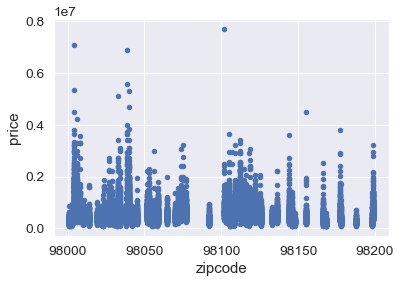

In [75]:
df.plot(x='zipcode',   
           y='price',
           kind='scatter');

### Square feet lot 15

In [76]:
X = df.sqft_lot15
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           3.30e-34
Time:                        17:01:08   Log-Likelihood:            -3.0732e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.261e+05   2750.361    191.269      0.000    5.21e+05    5.31e+05
sqft_lot15     1.1159      0.091     12.216      0.000       0.937       1.295
==============================================================================
Omnibus:                    19122.814   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142329.322
Skew:                           4.027   Prob(JB):                         0.00
Kurtosis:                      37.707   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$: The model explains 0% of the variability of Price (y).

$\hat{\beta}_0$: If we don't have sqft_lot15 factored in the picture, we would expect Price (y) to be 5.26 exponentially raised to power of 5. 

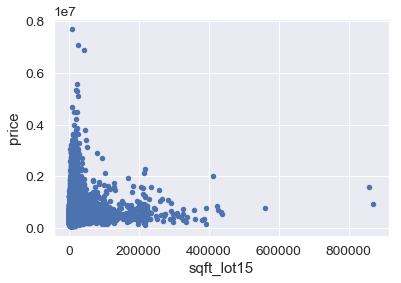

In [77]:
df.plot(x='sqft_lot15',   
           y='price',
           kind='scatter');

### Grade

In [78]:
X = df.grade
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:03:34   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 : The model explains 44.6% of the variability of Price (y).

β̂ 0 : If we don't have sqft_lot15 factored in the picture, we would expect Price (y) to be 2.09 exponentially raised to power of 5.

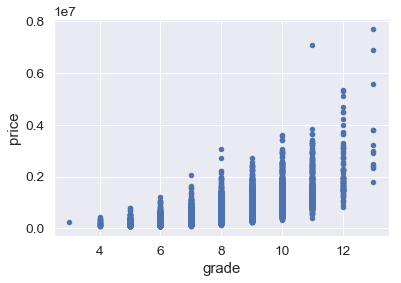

In [79]:
df.plot(x='grade',   
           y='price',
           kind='scatter');

### Bathrooms

In [80]:
X = df.bathrooms
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:03:37   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 : The model explains 2.8% of the variability of Price (y).

β̂ 0 : If we don't have sqft_lot15 factored in the picture, we would expect Price (y) to be 2.51 exponentially raised to power of 5.

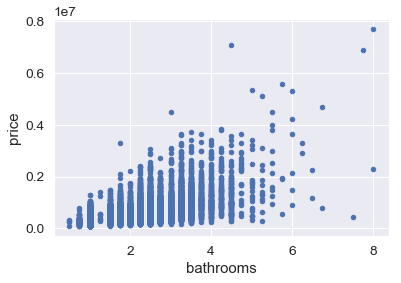

In [81]:
df.plot(x='bathrooms',   
           y='price',
           kind='scatter');

### Square Feet Living

In [100]:
X = df.sqft_living
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:10:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R2 : The model explains 49.3% of the variability of Price (y).

β̂ 0 : If we don't have sqft_lot15 factored in the picture, we would expect Price (y) to be 280.86

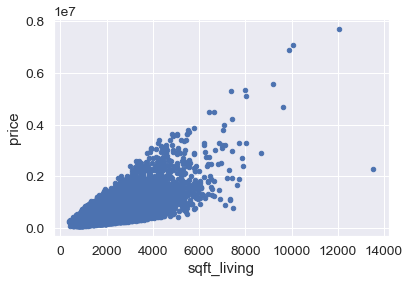

In [102]:
df.plot(x='sqft_living',   
           y='price',
           kind='scatter');

## Multiple Regression

In [103]:
import statsmodels.formula.api as smf

In [104]:
#GrLivArea: Above grade (ground) living area square feet
model = 'price ~ bedrooms +floors + condition + zipcode +grade +sqft_living'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     4698.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:11:47   Log-Likelihood:            -2.9837e+05
No. Observations:               21597   AIC:                         5.968e+05
Df Residuals:                   21590   BIC:                         5.968e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.791e+07   3.09e+06    -21.958      0.000    -7.4e+07   -6.19e+07
bedrooms    -4.269e+04   2214.660    -19.278      0.000    -4.7e+04   -3.84e+04
floors      -2.664e+04   3527.209     -7.553      0.000   -3.36e+04   -1.97e+04
condition    6.293e+04   2639.450     23.843      0.000    5.78e+04    6.81e+04
zipcode       684.5710     31.516     21.722      0.000     622.798     746.344
grade        1.089e+05   2325.027     46.855      0.000    1.04e+05    1.13e+05
sqft_living   215.7501      3.225     66.903      0.000     209.429     222.071
==============================================================================
Omnibus:                    16864.204   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1003932.726
Skew:                           3.272   Prob(JB):                         0.00
Kurtosis:                      35.754   Cond. No.                     1.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusions

After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 16%. The accuracy of the model is lower than our aim of 85. So how do we achieve that 85% target?  Perhaps a better model might be utilized to predict housing prices or there are too many variations in the outcome variables selected in this model (which adversely influenced the data).
Now I'm not quite sure if the categories choosen in my model are ideal.  However, all the P values for each category are low P values.  Thus, I would say they are statistically significant and do determine the sale price of homes in Kings County, Seattle.


I found this exercise interesting because factors that I intially thought would drive sales in Kings County (KC), Seattle differed than my expectations.  Before running a multicollinearity check on each outcome variable, I expected that, bathrooms, sqft_living, sqft_above, grade, yr_built, and sqft_living15 were going to drive the price of homes in KC.  Interestingly enough, after running multicollinearity, all but one of these outcome variables (yr_built) were highly correlated.  So they were not ideal for this analyses.  After running the multicollinearity, I discovered a new set of outcome variables for my data analysis (bedrooms, floors, condition, yr_built, zipcode, sqft_lot15.

From all the above outcome variables, their stats and graphs show many factors affect the prices of houses in KC.  For instance, square feet lot 15, and and zipcode influence the home prices in this area.  

Overall, I can say price is definitely swayed by a few outcome variables in this dataset.  In glancing at the scatterplots I concluded the following:

1) The more bedrooms a home has, influences the price of the home

2) Homes with 2 floors had the widest range in price in this dataset.  So I assumed many buyers are attracted to home with 2 floors

3) Homes with a condition of 3 also have the widest price range.  So this might be attractive to buyers in KC

4) Year built did not seem to influence the price too much.  I gather buyers have no preference if homes were built in 1900 or in 2019

5) The most desirable zip codes for buyers were in the 98000, 98050 and 98100 as there are many price clusters in these areas

6) Land lots to the nearest 15 neighbors were clustered at 0 to approx. 75,000

7) Factors that I thought would drive home sales (e.g. - Waterfront, view, etc.) really had no bearing on how a home price is predicted in KC